In [26]:
import pandas as pd
import numpy as np

# df = pd.read_csv("https://raw.githubusercontent.com/GrandmaCan/ML/main/Classification/Diabetes_Data.csv")
# df.to_csv("logistic.csv",index=False)
df = pd.read_csv("logistic.csv")
df["Gender"] = df["Gender"].map({"男生":1,"女生":0})
df

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,1,1
1,66,102,128.1,0,1
2,59,65,103.9,1,0
3,46,117,94.8,0,0
4,45,79,57.8,1,0
...,...,...,...,...,...
395,72,63,97.1,0,0
396,22,117,156.7,0,1
397,31,76,119.0,1,0
398,36,65,96.3,0,1


In [27]:
from sklearn.model_selection import train_test_split
x = df[["Age","Weight","BloodSugar","Gender"]]
y = df["Diabetes"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=87)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [30]:
w = np.array([1,2,3,4])
b = 1
z = (w*x_train).sum(axis=1)+b
y_pred = sigmoid(z)
y_pred

array([9.95698875e-01, 9.06375097e-01, 2.05197222e-03, 9.99871937e-01,
       9.99976601e-01, 9.99597573e-01, 9.42501826e-03, 6.58750315e-01,
       9.72220502e-01, 2.04535575e-03, 9.95406153e-01, 9.33440694e-01,
       9.99020890e-01, 6.88676986e-03, 8.77843224e-05, 7.26538573e-01,
       9.32368144e-01, 8.09433980e-02, 1.22884071e-02, 6.59095116e-01,
       9.35714906e-01, 6.38508320e-02, 3.04389233e-01, 9.30273981e-01,
       1.23897708e-03, 9.93625786e-01, 5.90053392e-02, 9.86068856e-01,
       1.89102010e-04, 1.33090984e-03, 8.85296779e-01, 9.99482973e-01,
       4.70219520e-04, 9.99353194e-01, 1.87660501e-01, 9.95430646e-01,
       9.98245826e-01, 9.99905804e-01, 9.77808458e-01, 4.92634254e-03,
       9.98319405e-01, 9.99759816e-01, 1.56719013e-01, 4.11932567e-01,
       1.47183312e-01, 8.92262698e-01, 9.92187079e-01, 1.02910854e-01,
       8.61895492e-01, 5.88617508e-02, 9.36987924e-02, 3.51332925e-01,
       9.22153819e-01, 2.12994568e-02, 6.66132695e-01, 9.13035739e-01,
      

Binary Cross Entropy

In [31]:
cost = -y_train*np.log(y_pred) - (1-y_train)*np.log(1-y_pred)
cost.mean()

np.float64(1.3959515636868534)

In [32]:
def compute_cost(y,w,x,b):
    z = (w*x).sum(axis=1)+b
    y_pred = sigmoid(z)
    cost = -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)
    return cost.mean()

In [33]:
compute_cost(y_train,w,x_train,b)

np.float64(1.3959515636868534)

In [34]:
def compute_gradient(y,w,x,b):
    z = (w*x).sum(axis=1)+b
    y_pred = sigmoid(z)
    w_gradient = np.zeros(x.shape[1])
    b_gradientt = (y_pred-y).mean()
    for i in range(x.shape[1]):
        w_gradient[i] = (x[:,i]*(y_pred-y)).mean()
    return w_gradient,b_gradientt

In [35]:
def gradient_descent(w_init,b_init,learning_rate):
    w = w_init
    b = b_init

    w_hist = [ ]
    b_hist = [ ]
    c_hist = [ ]

    for i in range(10000):
        w_gradient,b_gradient = compute_gradient(y_train,w,x_train,b)

        w = w-w_gradient*learning_rate
        b = b-b_gradient*learning_rate

        cost = compute_cost(y_train,w,x_train,b)

        if (i%1000 == 0):
            print(f"Interation {i} Cost: {cost:2e}")
        w_hist.append(w)
        b_hist.append(b)
        c_hist.append(cost)
    return w,b,w_hist,b_hist,c_hist

In [36]:
w_init = np.array([1,2,2,3])
b_init = 5
learning_rate = 1
w_final,b_final,w_hist,b_hist,c_hist = gradient_descent(w_init,b_init,learning_rate)

Interation 0 Cost: 2.487343e+00
Interation 1000 Cost: 2.300488e-01
Interation 2000 Cost: 2.300488e-01
Interation 3000 Cost: 2.300488e-01
Interation 4000 Cost: 2.300488e-01
Interation 5000 Cost: 2.300488e-01
Interation 6000 Cost: 2.300488e-01
Interation 7000 Cost: 2.300488e-01
Interation 8000 Cost: 2.300488e-01
Interation 9000 Cost: 2.300488e-01


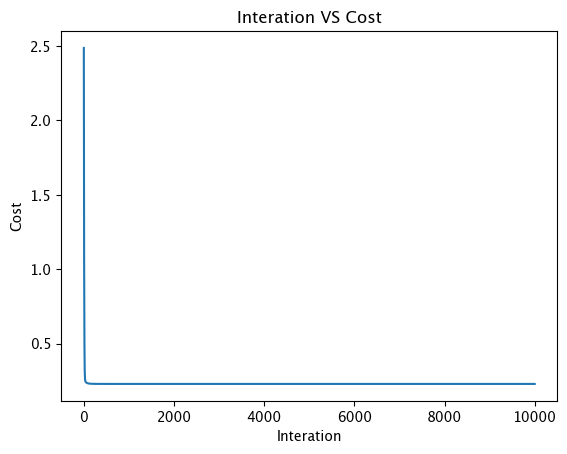

In [37]:
import matplotlib.pyplot as plt
plt.title("Interation VS Cost")
plt.xlabel("Interation")
plt.ylabel("Cost")
plt.plot(np.arange(0,10000),c_hist[:10000])
plt.show()

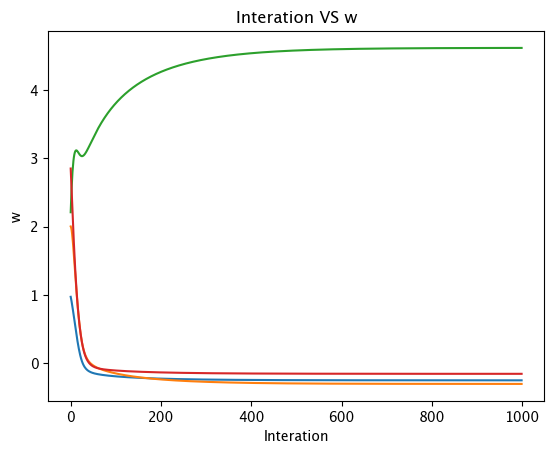

In [38]:
import matplotlib.pyplot as plt
plt.title("Interation VS w")
plt.xlabel("Interation")
plt.ylabel("w")
plt.plot(np.arange(0,1000),w_hist[:1000])
plt.show()

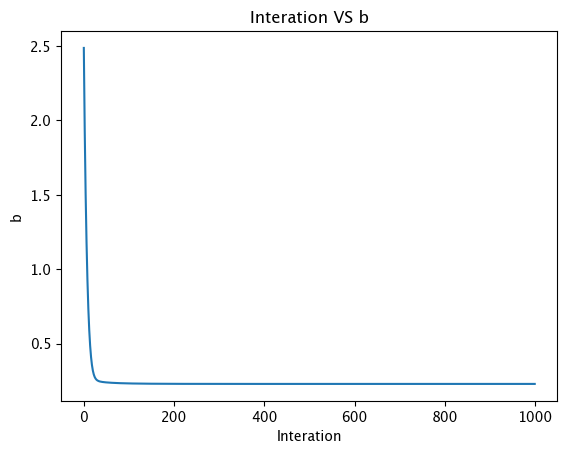

In [39]:
import matplotlib.pyplot as plt
plt.title("Interation VS b")
plt.xlabel("Interation")
plt.ylabel("b")
plt.plot(np.arange(0,1000),c_hist[:1000])
plt.show()

In [40]:
z = (w_final*x_test).sum(axis=1)+b_final
y_pred = sigmoid(z)
y_pred = np.where(y_pred>0.5,1,0)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [41]:
acc = ((y_pred == y_test).sum()/len(y_test))*100
print(f"正確率{acc}%")

正確率90.0%


In [42]:
# 72歲 90公斤 102血糖 女生
# 62   52    120    男生
x_real = np.array([[72,92,102,0],[62,52,120,1]])
x_real = scaler.transform(x_real)

z = (w_final*x_real).sum(axis=1)+b_final
y_real = sigmoid(z)
y_real

array([0.04348214, 0.70827407])

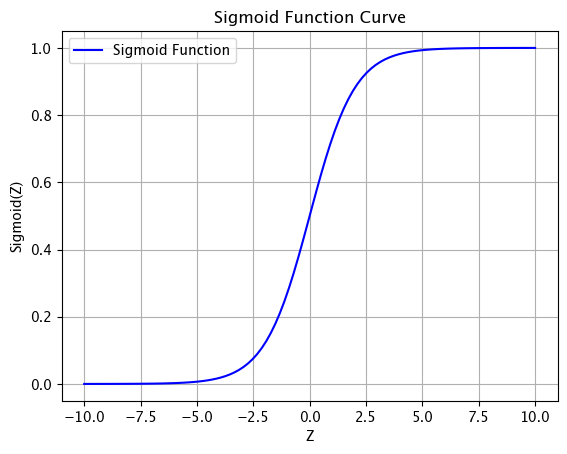

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# 定義 Sigmoid 函數
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


z = np.linspace(-10, 10, 100)  # 產生從 -10 到 10 的 100 個點
y = sigmoid(z)  # 計算 Sigmoid 值
plt.plot(z, y, label="Sigmoid Function", color="b")

# 設定標籤與標題
plt.xlabel("Z")
plt.ylabel("Sigmoid(Z)")
plt.title("Sigmoid Function Curve")
plt.legend()
plt.grid()
plt.show()
